In [190]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.stats import pearsonr, spearmanr
# plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('../images/presentation.mplstyle')

In [2]:
def get_cmap(n=20):
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

In [3]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00127.csv")
geo_stats_2 = pd.read_csv("corona_city_table_ver_0074.csv")
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0029.csv")


recover_data = pd.read_excel("corona_recovered_ver_00117.xlsx")
hospital_data = pd.read_csv("corona_hospitalization_ver_00227.csv")
dead_data = pd.read_csv("corona_deceased_ver_0093.csv")

age_gender_test_data = pd.read_csv("corona_age_and_gender_ver_0091.csv")
young_test_data = pd.read_excel("young_population_weekly_ver_0036.xlsx")

## organize geographic data 

In [576]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00127.csv")
geo_stats['date'] = pd.to_datetime(geo_stats['date'],format='%Y-%m-%d')

In [577]:
geo_stats['weeks_from'] = np.round((geo_stats['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_stats = geo_stats[geo_stats.weeks_from >= 0]

In [578]:
geo_stats = geo_stats.replace(to_replace={'<15': 4})

In [579]:
geo_float_columns = ['accumulated_cases',
       'new_cases_on_date', 'accumulated_recoveries', 'new_recoveries_on_date',
       'accumulated_hospitalized', 'new_hospitalized_on_date',
       'accumulated_deaths', 'new_deaths_on_date',
       'accumulated_diagnostic_tests', 'new_diagnostic_tests_on_date',
       'accumulated_vaccination_first_dose', 'new_vacc_first_dose_on_date',
       'accumulated_vaccination_second_dose', 'new_vacc_second_dose_on_date']
geo_stats[geo_float_columns] = geo_stats[geo_float_columns].astype(float)

In [580]:
weeks_dict_agas = {'weeks_from': 'first',
                   'town_code': 'first',
              'town': 'first', 
              'date': 'first', 
              'accumulated_cases': 'sum',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'sum', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'sum', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'sum',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'sum',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'sum',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'sum',
              'new_vacc_second_dose_on_date': 'sum'}
weeks_dict = {
              'town_code': 'first',
              'town': 'first', 
              'date': 'last', 
              'accumulated_cases': 'last',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'last', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'last', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'last',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'last',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'last',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'last',
              'new_vacc_second_dose_on_date': 'sum'}
geo_stats = geo_stats.groupby(['town_code', 'date'], as_index=False).agg(weeks_dict_agas)
geo_stats = geo_stats.groupby(['weeks_from', 'town_code'], as_index=False).agg(weeks_dict)

In [581]:
israel_population = pd.read_excel("israel_population_by_city.xlsx")

In [582]:
geo_stats[geo_stats.date == pd.to_datetime('2021-03-28',format='%Y-%m-%d')].accumulated_cases.sum()

759332.0

In [583]:
israel_population = israel_population.rename(columns={'city_code':'town_code'})

In [584]:
geo_stats = pd.merge(israel_population, geo_stats, how='right', on=['town_code'])

In [585]:
geo_stats2[(geo_stats2.weeks_from == 52) & (geo_stats2.town_code == 2600)]

weeks_from  town_code  town       date  accumulated_cases  \
13786          52       2600  אילת 2021-03-26             2315.0   

       new_cases_on_date  accumulated_recoveries  new_recoveries_on_date  \
13786               16.0                  2255.0                    38.0   

       accumulated_hospitalized  new_hospitalized_on_date  accumulated_deaths  \
13786                      59.0                       0.0                20.0   

       new_deaths_on_date  accumulated_diagnostic_tests  \
13786                 1.0                      127299.0   

       new_diagnostic_tests_on_date  accumulated_vaccination_first_dose  \
13786                          91.0                             31722.0   

       new_vacc_first_dose_on_date  accumulated_vaccination_second_dose  \
13786                         75.0                              28759.0   

       new_vacc_second_dose_on_date  
13786                          81.0

In [586]:
percentage_dict = {f'percentage_{w}' : 100 * geo_stats[w] / geo_stats['num_population'] for w in geo_float_columns}
percentage_dict['weeks_from'] = geo_stats.weeks_from
percentage_dict['town_code'] = geo_stats.town_code
percentage_df = pd.DataFrame(percentage_dict)

In [587]:
geo_stats = pd.merge(geo_stats, percentage_df, on=['weeks_from', 'town_code'], how='inner')

In [588]:
geo_stats_40 = geo_stats[geo_stats.weeks_from >= 40]
geo_stats_50 = geo_stats[(geo_stats.weeks_from >= 50) & geo_stats.weeks_from < 53]

In [589]:
geo_stats_40_sorted = geo_stats_40.sort_values(ascending=False, by=['percentage_accumulated_vaccination_second_dose'])

In [591]:
# geo_stats_48 = geo_stats[geo_stats['weeks_from'] == 48]
# geo_stats_50_52 = geo_stats[(geos_stats['weeks_from']>=50) & (geos_stats['weeks_from']<53)]
# total_country_per_week = geo_stats.groupby('weeks_from').agg(weeks_dict)
total_weeks_dict = {'date': 'last', 
              'accumulated_cases': 'sum',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'sum', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'sum', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'sum',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'sum',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'sum',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'sum',
              'new_vacc_second_dose_on_date': 'sum'}
total_country_per_week = geo_stats.groupby('weeks_from', as_index=False).agg(total_weeks_dict)[['weeks_from', 'new_cases_on_date']].rename(columns={'new_cases_on_date':'new_cases_on_date_country'})
geo_stats = pd.merge(total_country_per_week, geo_stats, how='right', on='weeks_from')

In [592]:
geo_stats['percentage_new_cases_on_date_country'] = 100 * geo_stats['new_cases_on_date_country'] / 9200000

In [609]:
# geo_stats.sort_values(ascending=False, by='num_population').num_population.unique()
geo_stats_big_cities = geo_stats[(geo_stats.num_population >= 1000)]
geo_stats_big_cities_40 = geo_stats_big_cities[geo_stats_big_cities.weeks_from >= 40]
geo_stats_40 = geo_stats[geo_stats.weeks_from >= 40]

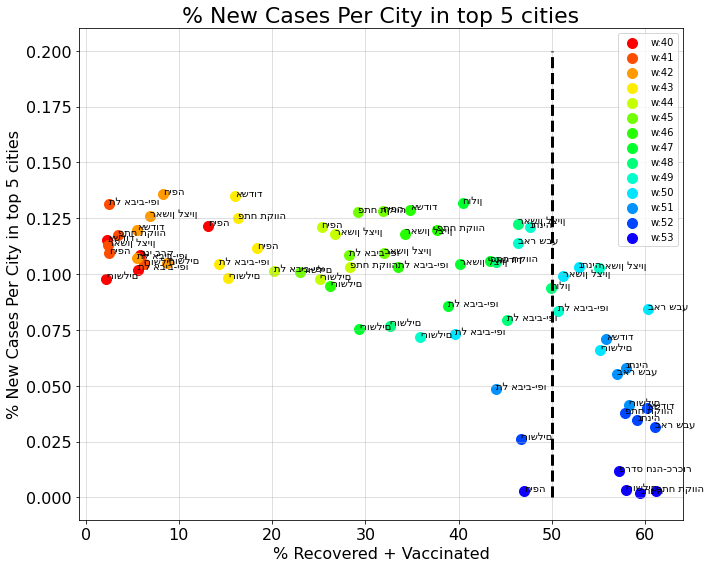

In [670]:
fig, ax = plt.subplots(1, 1)
pearson_coeff = []
spearman_coeff = []
colors = get_cmap(20)
num_cities = 5
for i, (w, df_w) in enumerate(geo_stats_40.groupby('weeks_from')):
    df_w = df_w.sort_values(ascending=False, by='new_cases_on_date')
    df_w = df_w.iloc[:num_cities,:]
    percentage_accumulated_r = df_w['percentage_accumulated_vaccination_second_dose'] + df_w['percentage_accumulated_recoveries']
#         percentage_new_cases = 100 * df_w['new_cases_on_date'] / np.sum(df_w['new_cases_on_date'])
    percentage_new_cases =  df_w['percentage_new_cases_on_date'] #- df_w['percentage_new_cases_on_date_country'])
    df_w['percentage_new_cases'] = percentage_new_cases
    ax.scatter(percentage_accumulated_r, percentage_new_cases, label=f'w:{w}', color=colors[i])
    p_coeff, _ = pearsonr(percentage_accumulated_r, df_w.percentage_new_cases_on_date)
    s_coeff, _ = spearmanr(percentage_accumulated_r, df_w.percentage_new_cases_on_date)
    pearson_coeff.append(p_coeff)
    spearman_coeff.append(s_coeff)
    df_w = df_w.sort_values(by='percentage_new_cases')
    for x, y, c in zip(percentage_accumulated_r, percentage_new_cases, df_w['town']):
        plt.text(x, y, c)
    
# for w, df_w in geo_stats_big_cities_40.groupby('weeks_from'):
# #     df_w = df_w[df_w['new_cases_on_date']> 10]
#     if df_w.shape[0] >2:
#         percentage_accumulated_r = df_w['accumulated_vaccination_second_dose'] + df_w['accumulated_recoveries']
#         if w<=49:
#             ax[0].scatter(df_w['new_cases_on_date'], percentage_accumulated_r, label=f'w:{w}')
#         else:
#             ax[1].scatter(df_w['new_cases_on_date'], percentage_accumulated_r, label=f'w:{w}')
#         p_coeff, _ = pearsonr(percentage_accumulated_r, df_w.new_cases_on_date)
#         s_coeff, _ = spearmanr(percentage_accumulated_r, df_w.new_cases_on_date)
#         pearson_coeff.append(p_coeff)
#         spearman_coeff.append(s_coeff)
#     else:
#         pearson_coeff.append(0)
#         spearman_coeff.append(0)

ax.set_xlabel('% Recovered + Vaccinated')
ax.set_title(f'% New Cases Per City in top {num_cities} cities')
ax.set_ylabel(f'% New Cases Per City in top {num_cities} cities')
ax.legend()
ax.grid()
ax.plot([50, 50], [0, 0.2], linestyle='--', linewidth=3, color='k')

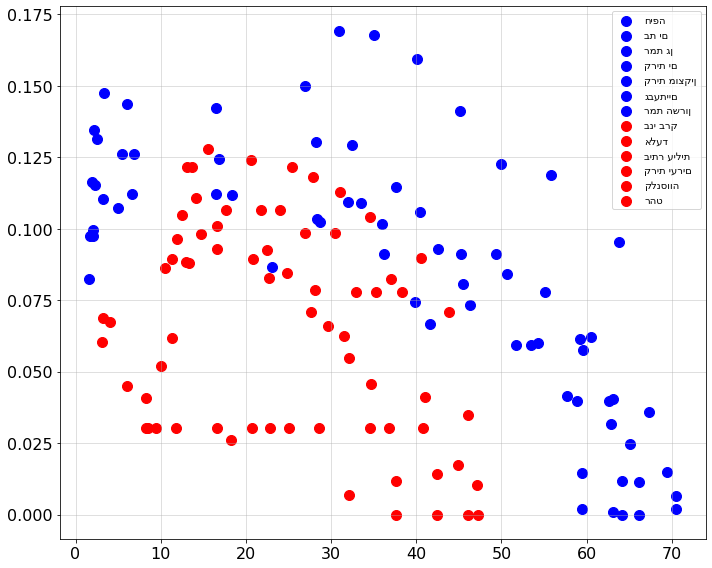

In [699]:
old_cities = ['חיפה', 'בת ים', 'רמת גן', 'קרית ים', 'קרית מוצקין', 'גבעתיים','רמת השרון']
young_cities = ['בני ברק', 'אלעד', 'ביתר עילית', 'קרית יערים', 'קלנסווה', 'רהט']
young_c = 'r'
old_c = 'b'
for c in old_cities:
    city_data = geo_stats_40[geo_stats_40['town'] == c]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c, color=old_c)
for c in young_cities:
    city_data = geo_stats_40[geo_stats_40['town'] == c]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c, color=young_c)
# city_data = geo_stats_40[geo_stats_40['town'] == 'חולון']
# percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
# percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
# plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c, color='g')
plt.grid()
plt.legend()

------- percentage new cases -----------
from week 40, pearson coeff:-0.36011575453026806
from week 40, spearman coeff:-0.3693926888134361
------- new cases -----------
from week 40, pearson coeff:0.600459039797044
from week 40, spearman coeff:0.42310864179748614
------- percentage cases per week -----------
w:40, pearon:-0.1496040002989729, spearman:0.10818727490996398
w:41, pearon:-0.2021030819441431, spearman:0.16081632653061223
w:42, pearon:-0.23790752208311317, spearman:0.06775510204081632
w:43, pearon:-0.28059348485613206, spearman:-0.1996158463385354
w:44, pearon:-0.30590837950108374, spearman:-0.22208883553421366
w:45, pearon:-0.25056021599988, spearman:-0.17675870348139258
w:46, pearon:-0.13871037630849167, spearman:-0.2562785114045618
w:47, pearon:-0.2716842728030065, spearman:-0.3093877551020408
w:48, pearon:-0.30015902795516286, spearman:-0.3357983193277311
w:49, pearon:-0.35335660055868096, spearman:-0.43644657863145253
w:50, pearon:-0.3174755116551876, spearman:-0.4326050

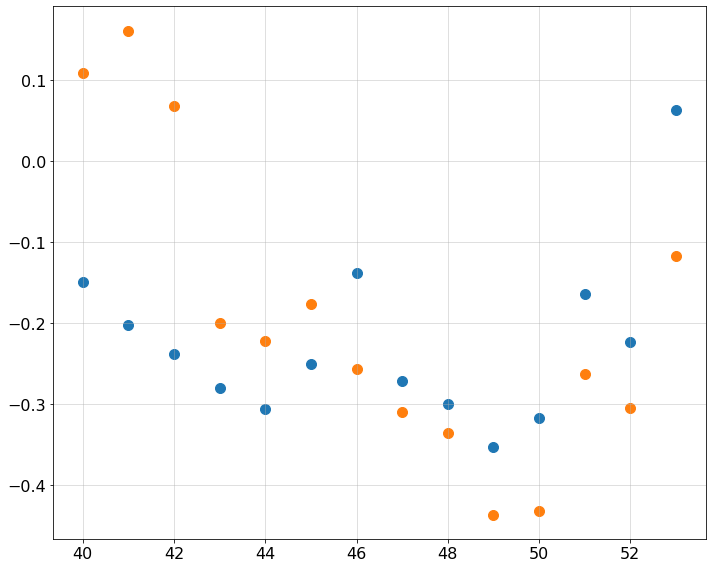

In [613]:
percentage_accumulated_tot_r = geo_stats_40.percentage_accumulated_vaccination_second_dose + geo_stats_40.percentage_accumulated_recoveries
p_coeff, _ = pearsonr(percentage_accumulated_tot_r, geo_stats_40.percentage_new_cases_on_date)
s_coeff, _ = spearmanr(percentage_accumulated_tot_r, geo_stats_40.percentage_new_cases_on_date)
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
print("------- percentage new cases -----------")
print(f"from week 40, pearson coeff:{p_coeff}")
print(f"from week 40, spearman coeff:{s_coeff}")

print("------- new cases -----------")
accumulated_tot_r = geo_stats_40.accumulated_vaccination_second_dose + geo_stats_40.accumulated_recoveries
p_coeff, _ = pearsonr(accumulated_tot_r, geo_stats_40.new_cases_on_date)
s_coeff, _ = spearmanr(accumulated_tot_r, geo_stats_40.new_cases_on_date)
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
print(f"from week 40, pearson coeff:{p_coeff}")
print(f"from week 40, spearman coeff:{s_coeff}")


print("------- percentage cases per week -----------")
a=[print(f"w:{w}, pearon:{p}, spearman:{s}") for (w, p, s) in zip(geo_stats_40.weeks_from.unique(), pearson_coeff, spearman_coeff) ]
plt.scatter(geo_stats_40.weeks_from.unique(), pearson_coeff, label='pearson')
plt.scatter(geo_stats_40.weeks_from.unique(), spearman_coeff, label='spearman')
plt.grid()

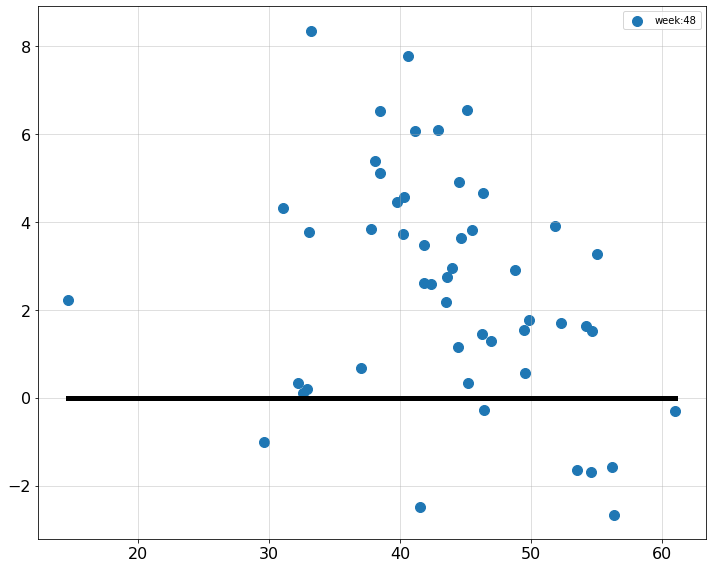

In [619]:
min_sick = 10
week = 48
# geo_stats_big_cities = geo_stats[(geo_stats.num_population >= 100)]
# geo_stats_big_cities = geo_stats_big_cities[((geo_stats_big_cities.weeks_from == week) | (geo_stats_big_cities.weeks_from == week - 2))]
# geo_stats_big_cities = geo_stats_big_cities[geo_stats_big_cities.new_cases_on_date > min_sick]
geo_stats_s_towns = geo_stats[geo_stats.weeks_from == week].sort_values(ascending=False, by=['new_cases_on_date'])['town_code'].iloc[:50]
geo_stats_s = geo_stats.sort_values(ascending=False, by=['weeks_from', 'new_cases_on_date'])
percentage_52 = 100 * (geo_stats_s[(geo_stats_s.weeks_from == week)]['percentage_new_cases_on_date'].iloc[:50] - geo_stats_s[geo_stats_s.weeks_from == week]['percentage_new_cases_on_date_country'].iloc[:50])
y = percentage_52
x = geo_stats_s[geo_stats_s.weeks_from == week].percentage_accumulated_vaccination_second_dose.iloc[:50] + geo_stats_s[(geo_stats_s.weeks_from == week)].percentage_accumulated_recoveries.iloc[:50]
plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(x, y, label=f"week:{week}")
plt.plot([np.min(x),np.max(x)], [0, 0], color='k', linewidth=5)
plt.grid()
plt.legend()

## organize vaccinations per age

In [4]:
geo_vacc_per_age = geo_vacc_per_age.replace(to_replace={'<15': 4})

In [5]:
geo_vacc_per_age['Date'] = pd.to_datetime(geo_vacc_per_age['Date'],format='%Y-%m-%d')
geo_vacc_per_age = geo_vacc_per_age.rename(columns={'Date':'date'})

In [6]:
geo_vacc_per_age.columns

Index(['CityName', 'CityCode', 'date', 'first_dose_0-19', 'first_dose_20-29',
       'first_dose_30-39', 'first_dose_40-49', 'first_dose_50-59',
       'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89',
       'first_dose_90+', 'second_dose_0-19', 'second_dose_20-29',
       'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
       'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89',
       'second_dose_90+'],
      dtype='object')

In [7]:
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
geo_vacc_per_age[float_columns] = geo_vacc_per_age[float_columns].astype(float)

In [8]:
agg_dict = {k:'sum' for k in float_columns}
geo_vacc_per_age = geo_vacc_per_age.groupby('date', as_index=False).agg(agg_dict)

In [9]:
agg_dict_weeks = {k:'last' for k in float_columns}
agg_dict_weeks['date'] = 'last'
geo_vacc_per_age['weeks_from'] = np.round((geo_vacc_per_age['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_vacc_per_age = geo_vacc_per_age.groupby('weeks_from', as_index=False).agg(agg_dict_weeks)

In [10]:
geo_vacc_per_age[['weeks_from','date']][geo_vacc_per_age['date']>=pd.to_datetime('2020-07-01',format='%Y-%m-%d')]

weeks_from       date
0           39 2020-12-25
1           40 2021-01-01
2           41 2021-01-08
3           42 2021-01-15
4           43 2021-01-22
5           44 2021-01-29
6           45 2021-02-05
7           46 2021-02-12
8           47 2021-02-19
9           48 2021-02-26
10          49 2021-03-05
11          50 2021-03-12
12          51 2021-03-19
13          52 2021-03-26
14          53 2021-03-30

## edit vaccinations data

In [11]:
geo_for_vacc = geo_stats[['date','accumulated_cases', 'accumulated_recoveries','accumulated_hospitalized',
                              'accumulated_deaths', 'accumulated_diagnostic_tests', 
                               'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']]

In [12]:
geo_for_vacc = geo_for_vacc.replace(to_replace={'<15': 4})

In [13]:
geo_for_vacc['date'] = pd.to_datetime(geo_for_vacc['date'],format='%Y-%m-%d')
geo_for_vacc = geo_for_vacc[geo_for_vacc['date'] >= pd.to_datetime('2020-03-21',format='%Y-%m-%d')]

In [14]:
geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']] = geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']].astype(float)

In [15]:
vaccinations_data = geo_for_vacc.groupby('date', as_index=False).agg(
    {'accumulated_cases':'sum',
     'accumulated_recoveries':'sum',
     'accumulated_hospitalized':'sum',
     'accumulated_diagnostic_tests':'sum',
    'accumulated_deaths':'sum',
     'accumulated_vaccination_first_dose':'sum',
     'accumulated_vaccination_second_dose':'sum'
    })

In [16]:
vaccinations_data['weeks_from'] = np.round((vaccinations_data['date'] - vaccinations_data['date'][0]).dt.days / 7, 1).astype(int)

In [17]:
# vaccinations_data[vaccinations_data['date'] == '2021-02-18']
# closed_schools = [(0, 6), (14, 23), (25, 31), (41, 45)]
# schools_opened = [()]

In [18]:
vaccinations_data = vaccinations_data.groupby('weeks_from', as_index=False).agg(
    {'accumulated_cases':'last',
     'accumulated_recoveries':'last',
     'accumulated_hospitalized':'last',
     'accumulated_diagnostic_tests':'last',
    'accumulated_deaths':'last',
     'accumulated_vaccination_first_dose':'last',
     'accumulated_vaccination_second_dose':'last',
     'date':'last'
    })

In [19]:
# change names in data from hebrew to english:
hospital_data_columns_english = ['date', 'num_hospitalizations', 'percentage_women_hospilizations', 'mean_age_hospilizations', 'variance_age_hospilizations', 
                                'num_ventilizations', 'percentage_women_ventilizations','mean_age_ventilizations', 'variance_age_ventilizations',
                                'easy_cases', 'percentage_women_easy_cases', 'mean_age_easy_cases', 'variance_age_easy_cases',
                                'medium_severity', 'percentage_women_medium_severity', 'mean_age_medium_severity', 'variance_age_medium_severity',
                                'severe_cases', 'percentage_women_severe_cases', 'mean_age_severe_cases', 'variance_age_severe_cases', 'cumulative_severe_cases']
column_names_to_english = {k:v for k,v in zip(hospital_data.columns, hospital_data_columns_english)}
hospital_data = hospital_data.rename(columns = column_names_to_english)

In [20]:
hospital_data['date'] = pd.to_datetime(hospital_data['date'],format='%Y-%m-%d')

In [21]:
# mean_age = hospital_data['mean_age_severe_cases']
# plt.plot(hospital_data['date'], mean_age, marker='*')
# plt.grid()

## organize age and gender data

In [22]:
# change names of male, female and unknown to numbers
gender_name_replace = {'זכר' : 0, 
                       'נקבה': 1,
                       'לא ידוע' : -1}
age_gender_test_data['gender'] = age_gender_test_data['gender'].replace(to_replace = gender_name_replace)

In [23]:
# changing all values that say <15 to 7 which is the mean value
age_gender_test_data = age_gender_test_data.replace(to_replace={'<15': 1,
                                                               '80+': '80-100'})
young_test_data = young_test_data.replace(to_replace={'<15': 1})
age_gender_test_data = age_gender_test_data.dropna()

In [24]:
# split ages with - and make two columns
age_gender_test_data[['min_age', 'max_age']] =age_gender_test_data['age_group'].str.split('-',expand=True)
young_test_data[['min_age', 'max_age']] =young_test_data['age_group'].str.split('-',expand=True)

In [25]:
# change date format to datetime and add column of weeks from
age_gender_test_data['first_week_day'] = pd.to_datetime(age_gender_test_data['first_week_day'],format='%Y-%m-%d')
age_gender_test_data['last_week_day'] = pd.to_datetime(age_gender_test_data['last_week_day'],format='%Y-%m-%d')
young_test_data['first_week_day'] = pd.to_datetime(young_test_data['first_week_day'],format='%Y-%m-%d')
young_test_data['last_week_day'] = pd.to_datetime(young_test_data['last_week_day'],format='%Y-%m-%d')

In [26]:
# change dtype of float columns from object to float
age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']] = age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']].astype(float)
young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']] = young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']].astype(float)

In [27]:
# make a column which is the weeks from the beginning of the pandemic
age_gender_test_data['weeks_from'] = np.round((age_gender_test_data['last_week_day'] - age_gender_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)
young_test_data['weeks_from'] = np.round((young_test_data['last_week_day'] - young_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)

In [28]:
# keep only relevant columns
columns_age_gender = ['weeks_from', 'min_age', 'max_age', 'gender', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']
age_gender_test_data = age_gender_test_data[columns_age_gender]

In [29]:
# remove gender information
age_gender_test_data = age_gender_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'gender':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_deceased':'sum'})
young_test_data = young_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'region':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_newly_tested': 'sum'})
young_test_data = young_test_data.drop(columns='region')

## get percentages of each age group

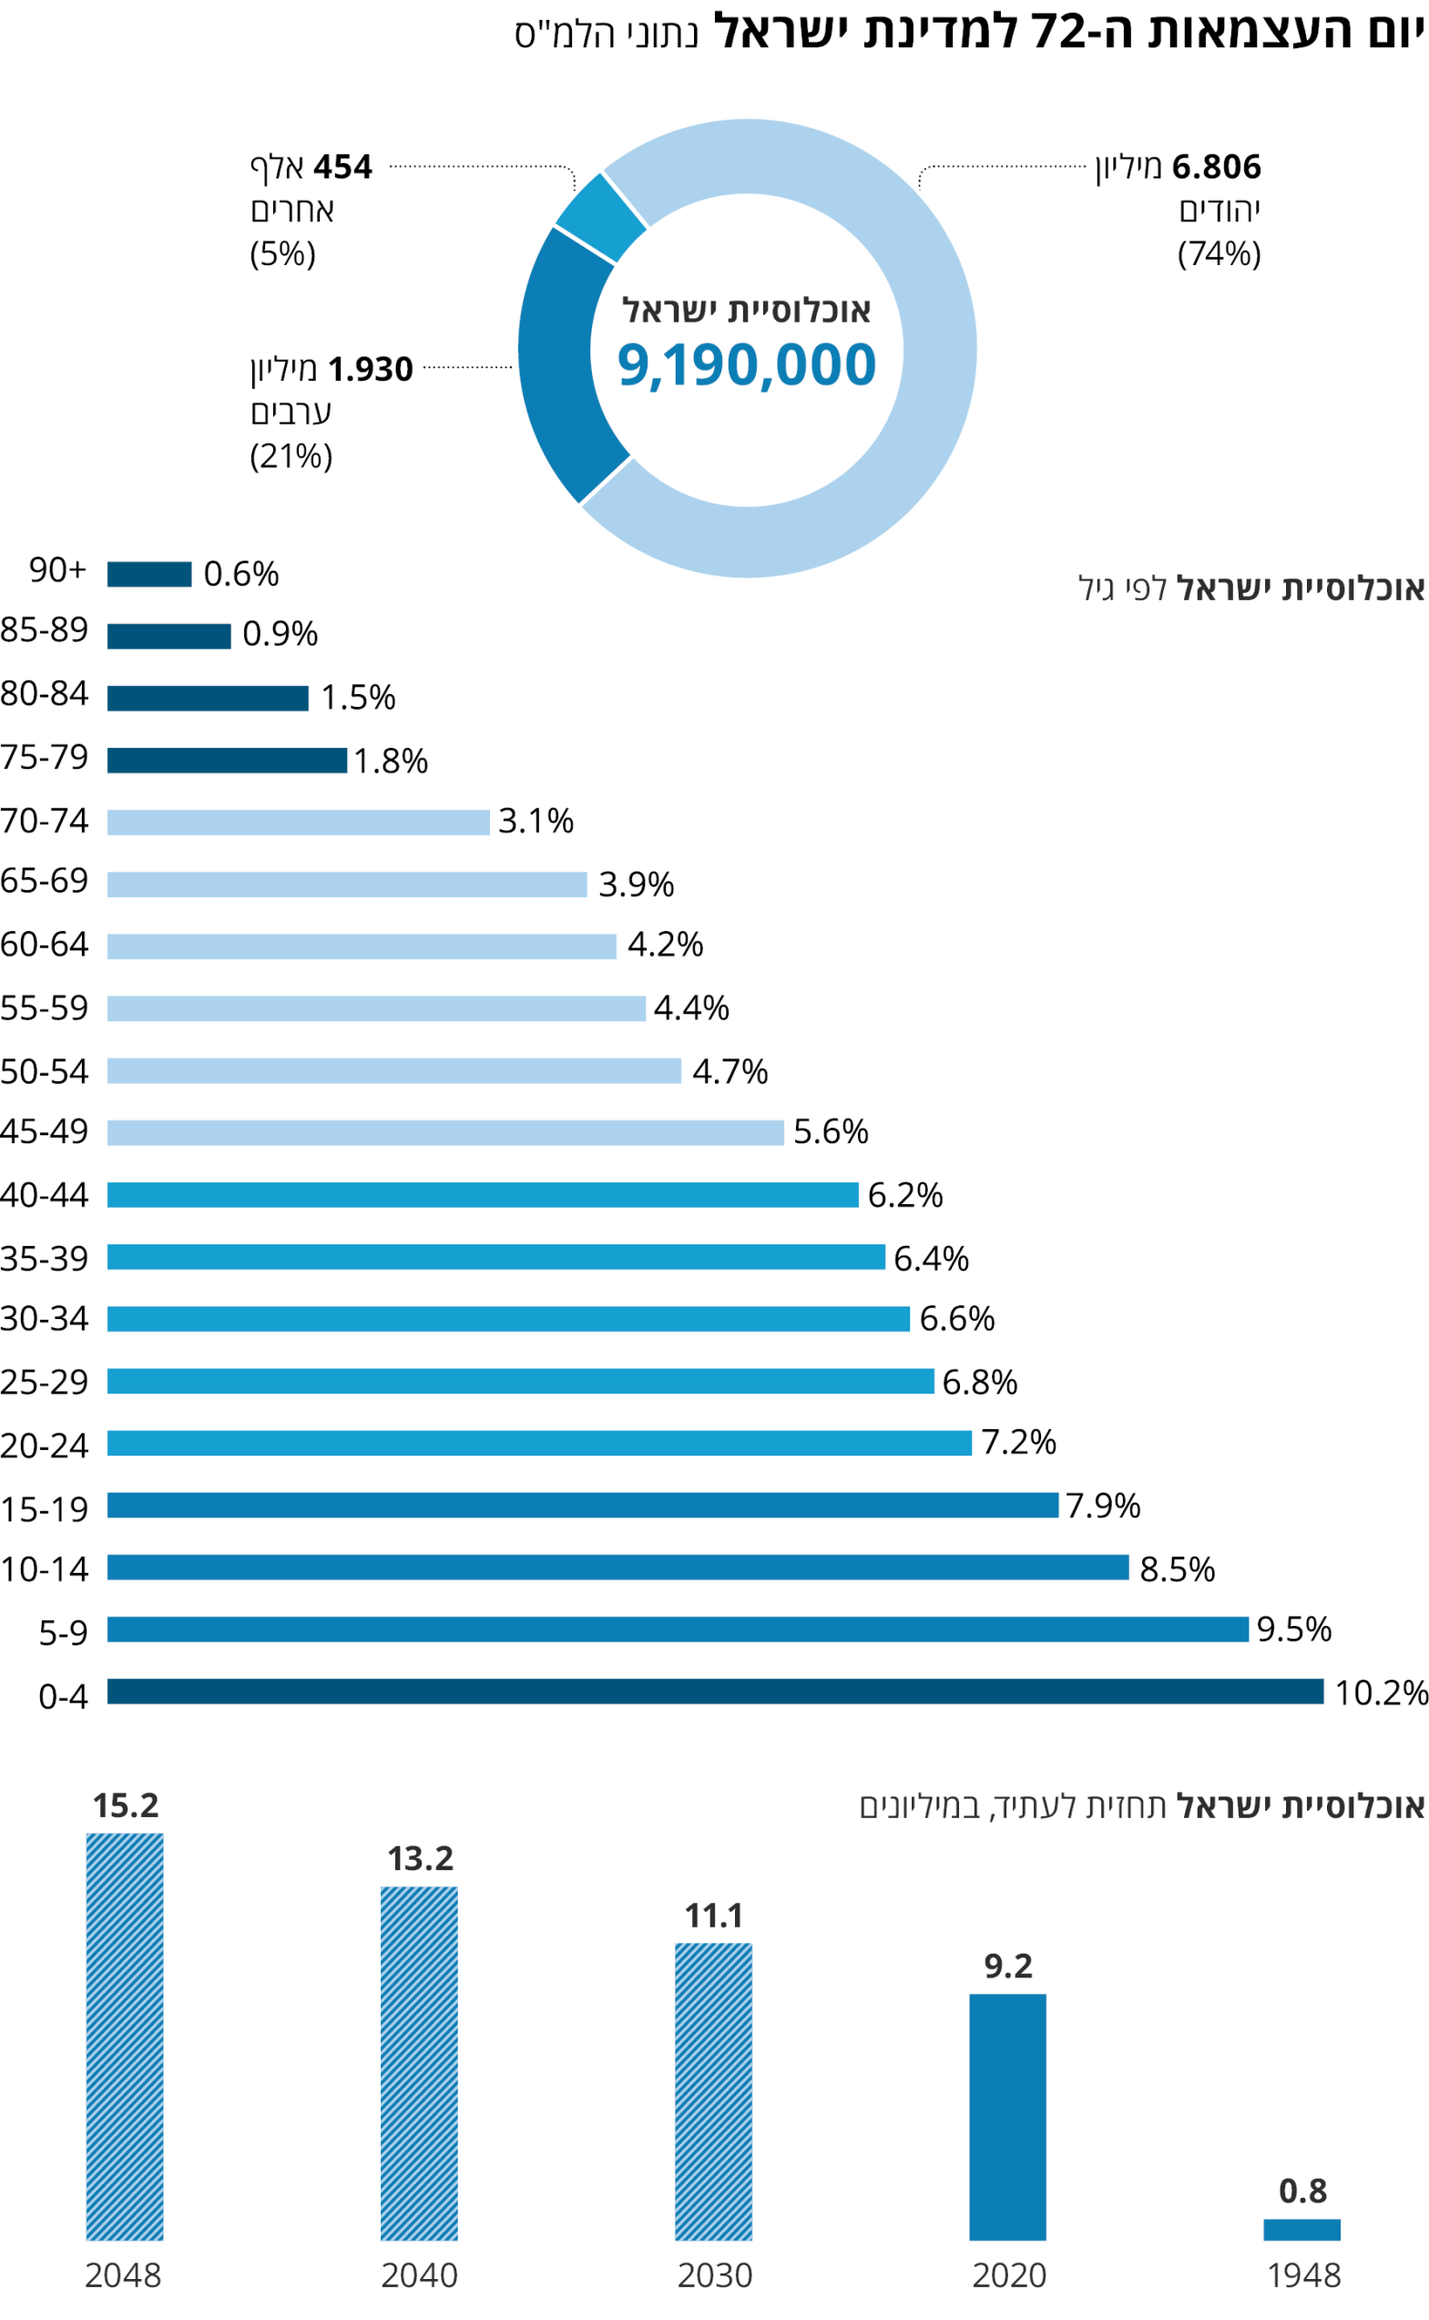

In [30]:
total_population = 9.2 * 10**6

In [31]:
# add data about amount in population - young table
percentage_in_population_young = {4: 10.2,
                           9: 9.5,
                           14:8.5,
                           19: 7.9}
percentage_in_population_young2 = {2: 7,
                           5: 6,
                           8:6,
                           11: 5,
                            14:5,
                            17:4,
                            20:4}
num_in_population_young = {k: v * total_population / 100 for (k, v) in percentage_in_population_young2.items()}
age_info_in_population_young = {'max_age': list(percentage_in_population_young2.keys()),
                         'percentage_age': list(percentage_in_population_young2.values()),
                         'total_age_in_population': list(num_in_population_young.values())}
age_info_in_population_young_df = pd.DataFrame.from_dict(age_info_in_population_young)

In [32]:
# add data about amount in population - older ages
percentage_in_population = {19: 36.1,
                           24:7.2,
                           29:6.8,
                           34: 6.6,
                           39:6.4,
                           44:6.2,
                           49:5.6,
                           54:4.7,
                           59:4.4,
                           64:4.2,
                           69:3.9,
                           74:3.1,
                           79:1.8,
                           100:3}
num_in_population = {k: v * total_population / 100 for (k, v) in percentage_in_population.items()}
age_info_in_population = {'max_age': list(percentage_in_population.keys()),
                         'percentage_age': list(percentage_in_population.values()),
                         'total_age_in_population': list(num_in_population.values())}
age_info_in_population_df = pd.DataFrame.from_dict(age_info_in_population)

In [33]:
# merge population data with covid data for both tables
age_gender_test_data = pd.merge(age_info_in_population_df, age_gender_test_data, how='right', on='max_age')
young_test_data = pd.merge(age_info_in_population_young_df, young_test_data, how='right', on='max_age')

In [34]:
# create aggregated table of total number of cases for each week
test_data_agg_weeks = age_gender_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_deceased':'sum',
                                                                                      'weekly_cases':'sum'})
test_data_young_agg_weeks = young_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_newly_tested':'sum',
                                                                                       'weekly_cases':'sum'})

## draw results for older data 

In [35]:
def draw_per_total(table_per_age, total_table, with_dead = True, with_new = False, seperate_tables = False):
    colors = get_cmap(n=40)
    if not seperate_tables:
        if with_dead or with_new:
            fig, ax = plt.subplots(3, 1)
        else:
            fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(table_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_total_pos = np.array(total_table['weekly_cases'])
        n_total_tests = np.array(total_table['weekly_tests_num'])
        if seperate_tables:
            if (with_dead or with_new):
                fig, ax = plt.subplots(3, 1)
            else:
                fig, ax = plt.subplots(2, 1)
        if with_dead:
            n_total_dec = np.array(total_table['weekly_deceased'])
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_total_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of dead per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            n_total_new = np.array(test_data_young_agg_weeks['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_total_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of new tests per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        percentage_in_population = df_a.percentage_age.unique().item()
        ax[0].plot(n_weeks, 100 * n_pos / n_total_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[0].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        ax[1].plot(n_weeks, 100 * n_tests / n_total_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[1].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        if seperate_tables:
            ax[0].legend()
            ax[1].legend()
            ax[0].grid()
            ax[1].grid()
            ax[0].set_title('% of positive cases per age')
            ax[1].set_title('% of tests per age')
            ax[0].set_ylabel('% of positive cases from total cases')
            if with_dead or with_new:
                ax[2].legend()
                ax[2].grid()
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('% of positive cases per age')
    ax[1].set_title('% of tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
    return fig, ax

In [36]:
def draw_per_population(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [37]:
def draw_vaccinations_percentage(vacc_data, fig, ax):
    percentage_first = (vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_first_dose']) * 100 / total_population
    percentage_second =(vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_second_dose']) * 100 / total_population
    ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ax2 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

In [38]:
def draw_per_max(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        max_pos = np.max(n_pos)
        max_tests = np.max(n_tests)
        ax[0].plot(n_weeks, 100 * n_pos / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / max_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            max_dec = np.max(n_dec)
            ax[2].plot(n_weeks, 100 * n_dec / max_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            max_new = np.max(n_new)
            ax[2].plot(n_weeks, 100 * n_new / max_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/max new per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/max positive cases per age ')
    ax[1].set_title('number of tests/max tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [39]:
def draw_absolute_numbers(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new , color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases per age ')
    ax[1].set_title('number of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [40]:
def draw_lockdowns(fig, ax, max_y0, max_y1):
    lockdown_times = [(25, 30),
                     (41,47)]
    colors = ['k', 'k']
    for i, l in enumerate(lockdown_times):
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y0, alpha=0.1, color=colors[i])
        ax[0].add_patch(rec)
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y1, alpha=0.1, color=colors[i])
        ax[1].add_patch(rec)


In [41]:
def draw_new_x_axis(data, fig, ax):
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(data.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in data.date[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y\n') for item in data.date[::12]]
    positions = data['weeks_from'].to_numpy()
    ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
    ax_new = plt.setp(ax[1], xticks=positions, xticklabels=ticklabels)

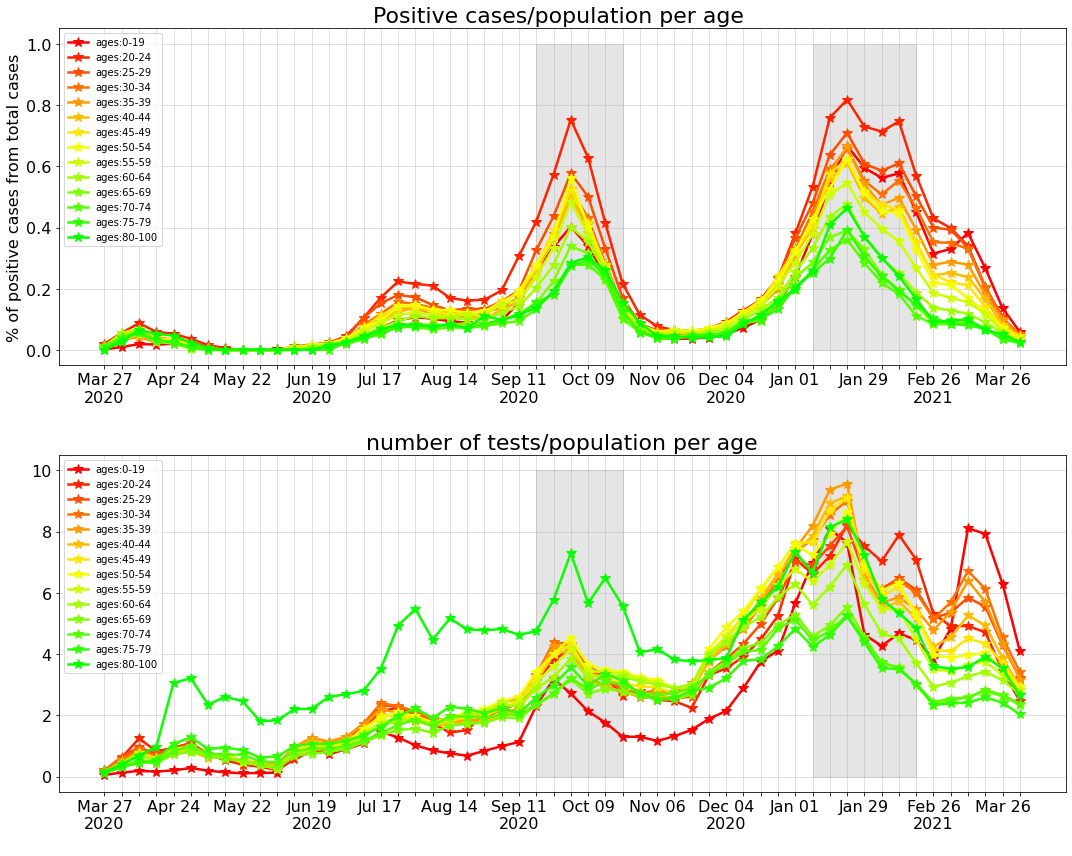

In [42]:
fig, ax = draw_per_population(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1, max_y1=10)
draw_new_x_axis(vaccinations_data, fig, ax)

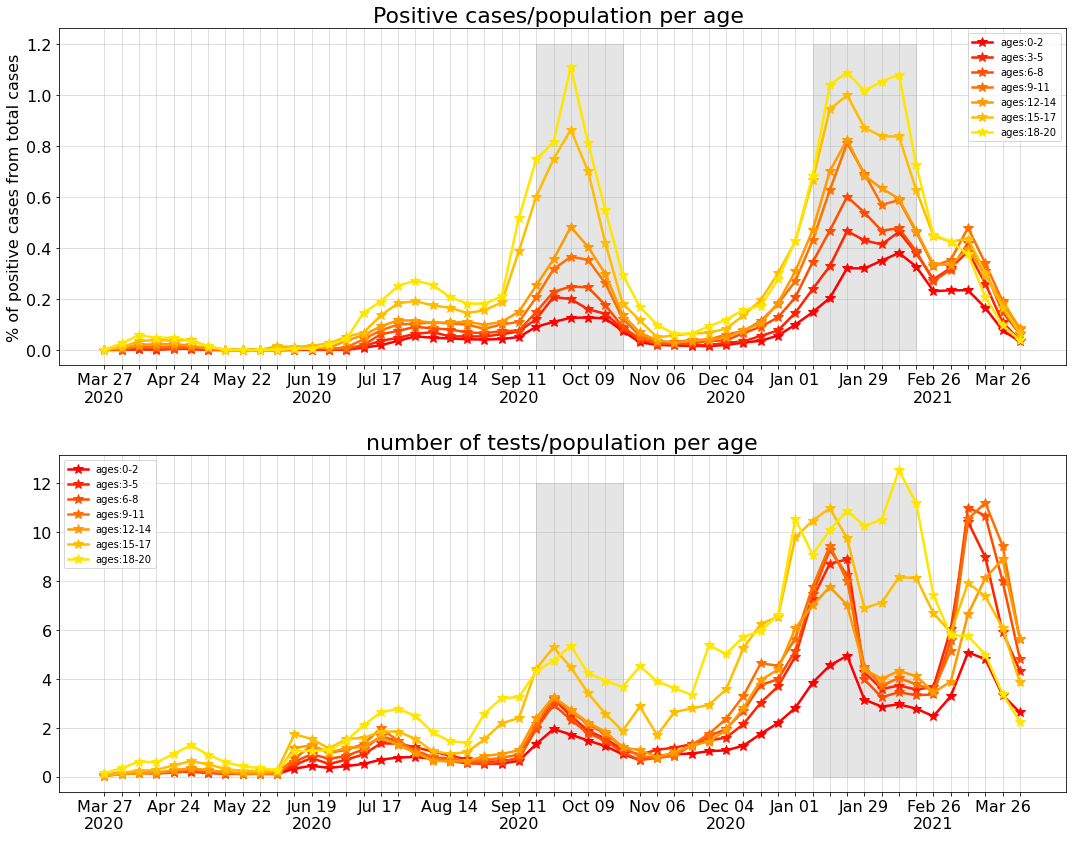

In [43]:
fig, ax = draw_per_population(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1.2, max_y1=12)
draw_new_x_axis(vaccinations_data, fig, ax)

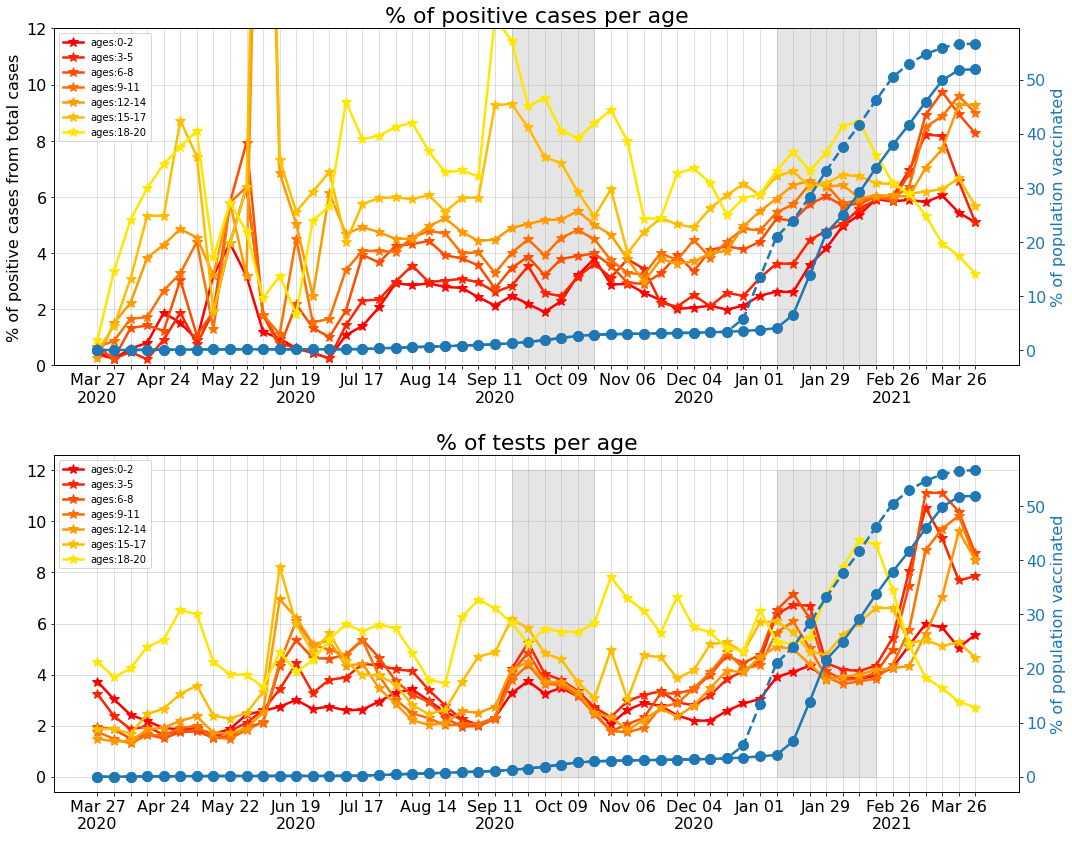

In [44]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_dead=False, with_new=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=45, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)
fig.tight_layout()

## combine all ages into one table

In [45]:
age_gender_test_data_temp = age_gender_test_data[age_gender_test_data.max_age != 19]
all_testing_data = pd.concat([young_test_data, age_gender_test_data_temp]).drop(columns=['gender', 'weekly_deceased', 'weekly_newly_tested'])

In [46]:
young_data_tot = young_test_data[young_test_data.max_age != 20]

In [47]:
young_data_tot = young_data_tot.groupby('weeks_from', as_index=False).agg({'max_age': 'last', 
                                        'percentage_age':'sum',
                                        'total_age_in_population': 'sum',
                                        'min_age':'first',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases':'sum',
                                        'weekly_newly_tested':'sum'})

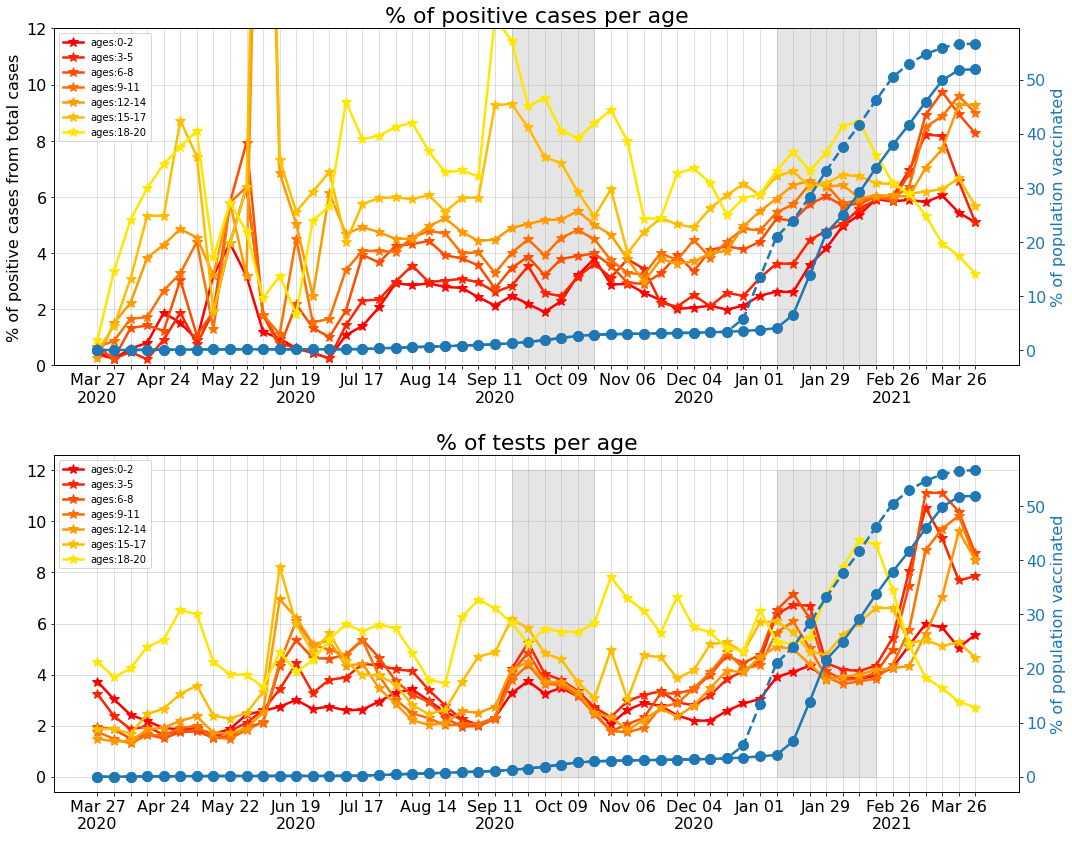

In [48]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=12, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

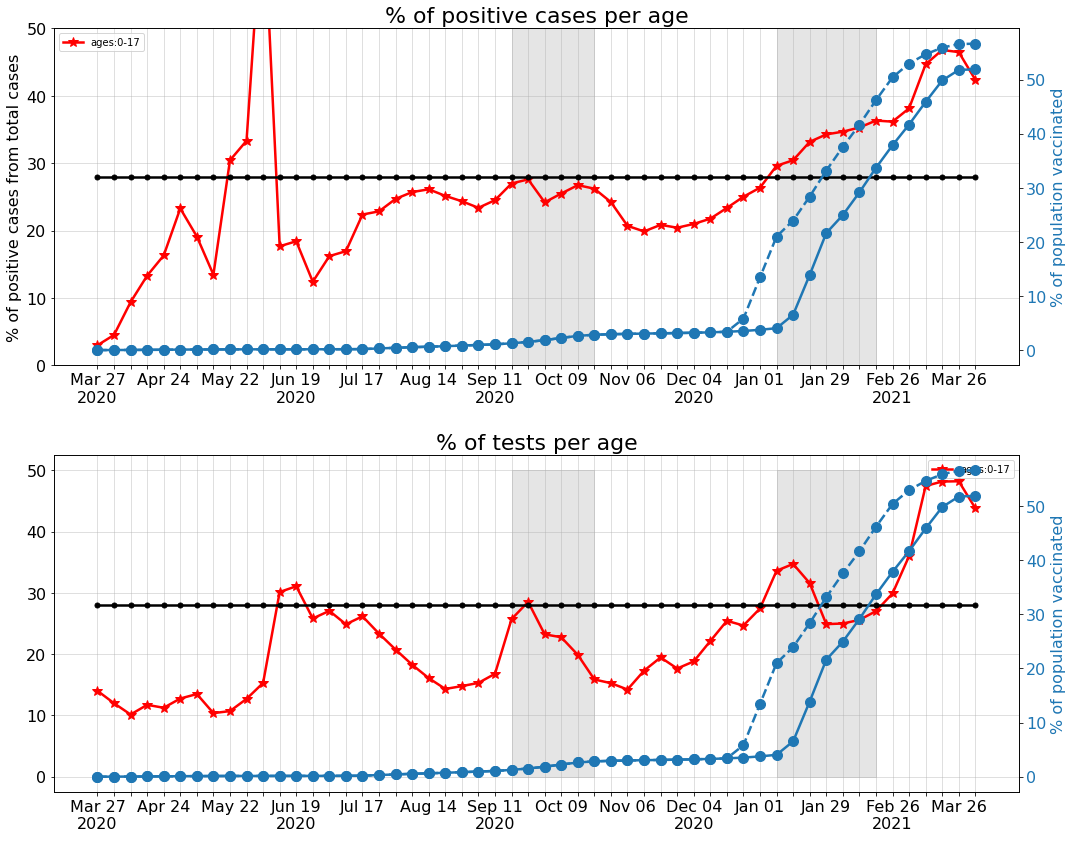

In [49]:
fig, ax = draw_per_total(young_data_tot, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[1].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[0].set_ylim([0, 50])
draw_lockdowns(fig, ax, max_y0=50, max_y1=50)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [50]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(vaccinations_data['weeks_from'], vaccinations_data.weeks_from)
# ax[0].grid()
# positions = vaccinations_data['weeks_from'].to_numpy()

# ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
# # ax[0].set_xticks(positions, labels)A
# # draw_lockdowns(fig, ax, max_y0=800000, max_y1=1)
# # draw_vaccinations_percentage(vaccinations_data, fig, ax)

In [51]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


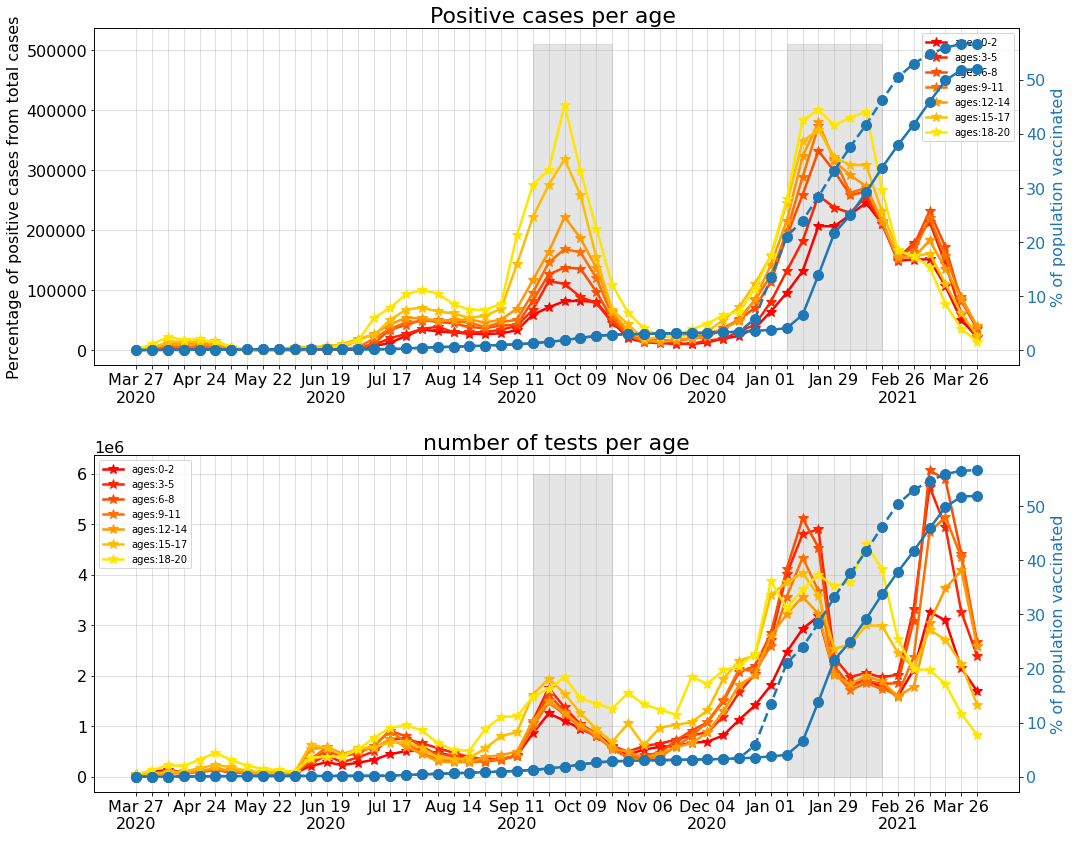

In [52]:
fig, ax = draw_absolute_numbers(young_test_data, with_dead=False)
draw_lockdowns(fig, ax, max_y0=510000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

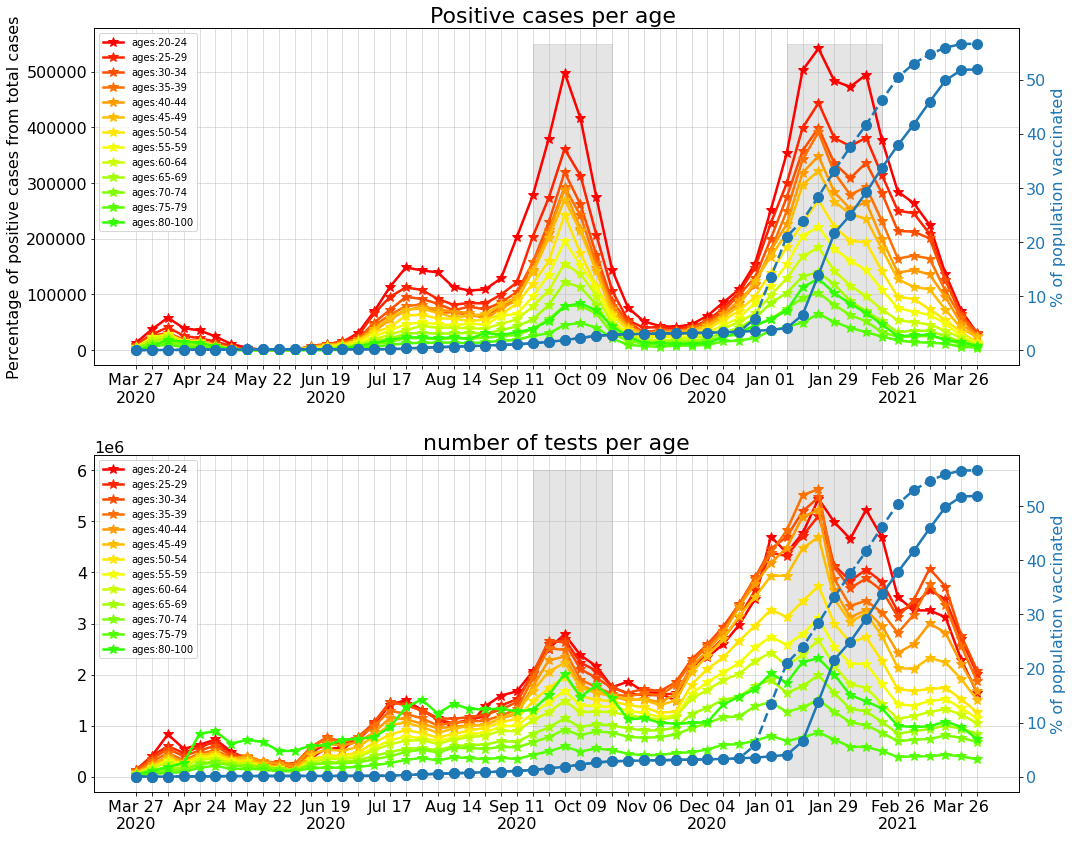

In [53]:
fig, ax = draw_absolute_numbers(age_gender_test_data_temp, with_dead=False)
draw_lockdowns(fig, ax, max_y0=550000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

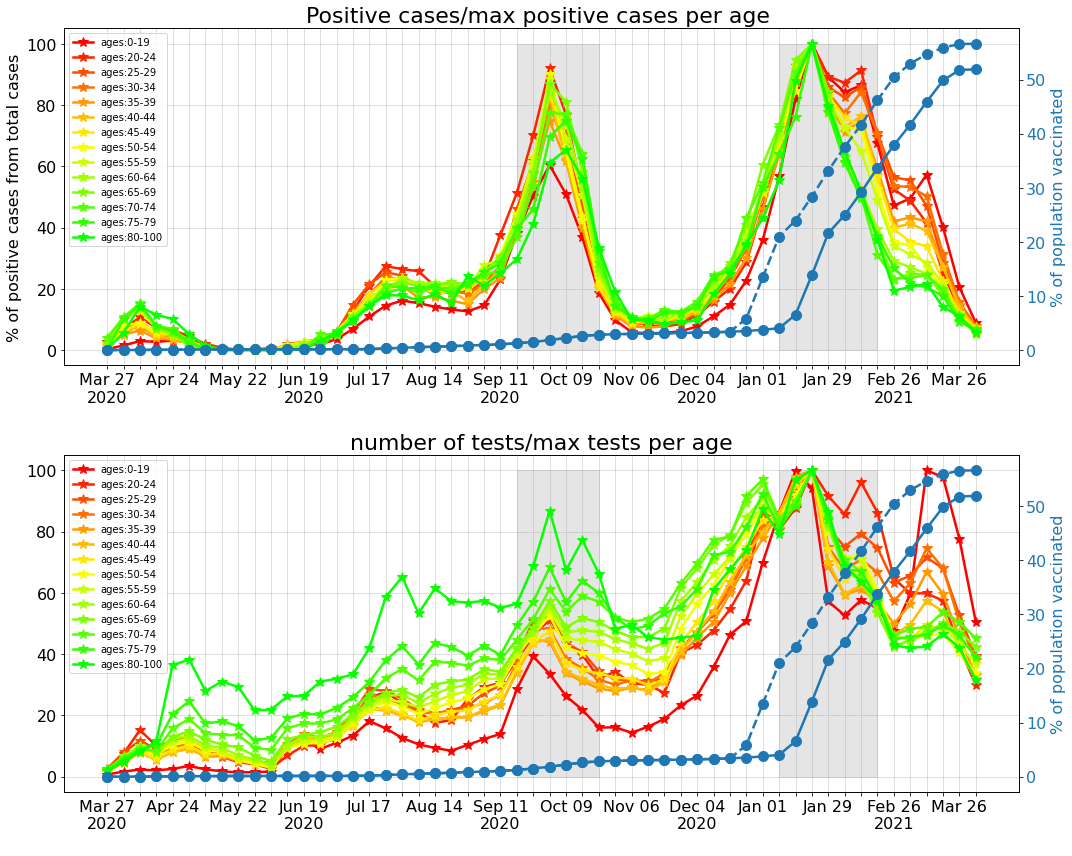

In [54]:
fig, ax = draw_per_max(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

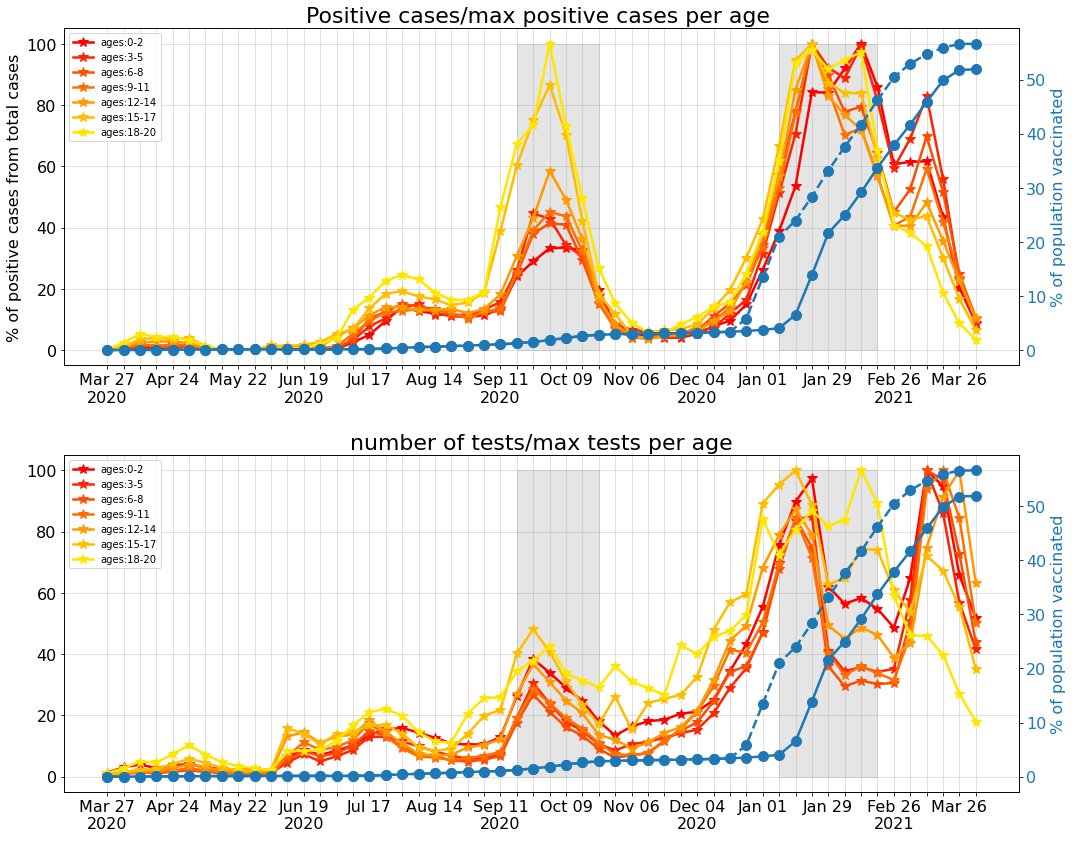

In [55]:
fig, ax = draw_per_max(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [56]:
agg_data_temp = all_testing_data.groupby(['min_age', 'max_age'], as_index = False).agg({'percentage_age': 'first', 
                                                                         'total_age_in_population': 'first', 
                                                                        'weeks_from': 'last', 
                                                                        'weekly_tests_num': 'sum', 
                                                                        'weekly_cases': 'sum'})
total_cases = np.sum(agg_data_temp.weekly_cases)

In [57]:
agg_data_temp['percentage_positive'] = np.round(100 * agg_data_temp.weekly_cases / total_cases, 3)

In [58]:
# agg_data_temp[['min_age', 'max_age', 'percentage_positive']]

Text(0, 0.5, 'Age group')

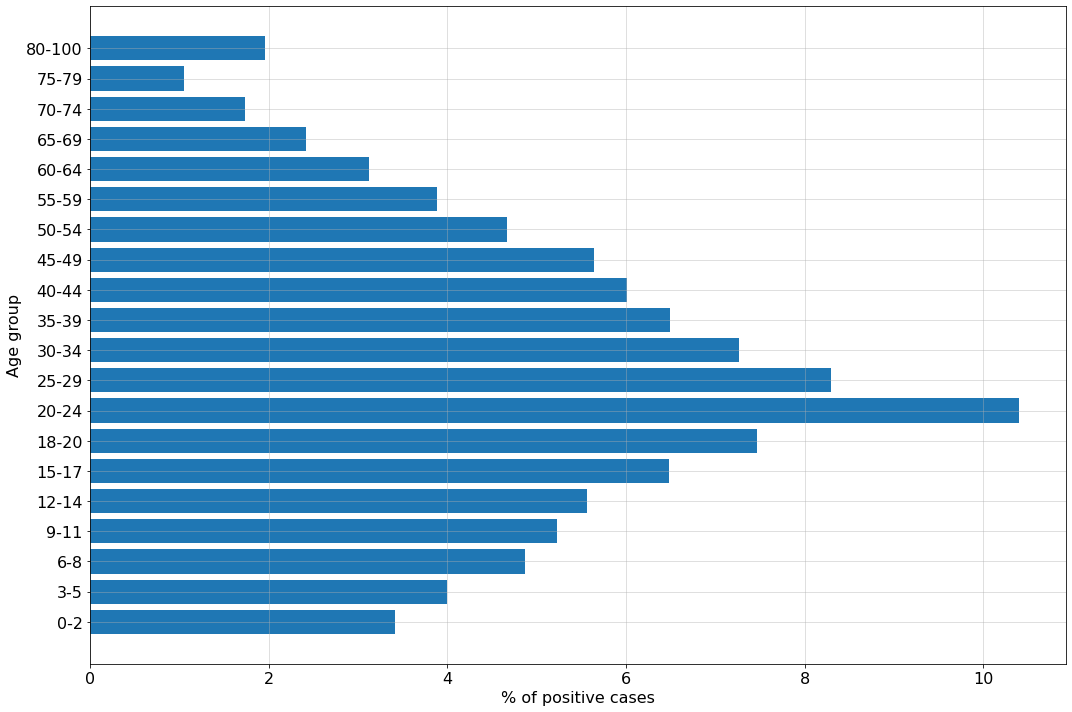

In [59]:
plt.rcParams["figure.figsize"] = (15,10)
height = agg_data_temp.percentage_positive
bars = [f"{int(i)}-{j}" for i,j in zip(agg_data_temp.min_age, agg_data_temp.max_age)]
y_pos = np.arange(len(bars))
plt.grid()
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.xlabel('% of positive cases')
plt.ylabel('Age group')

In [60]:
geo_vacc_second_over_60 = geo_vacc_per_age['second_dose_60-69'] + geo_vacc_per_age['second_dose_70-79'] + geo_vacc_per_age['second_dose_80-89'] + geo_vacc_per_age['second_dose_90+']

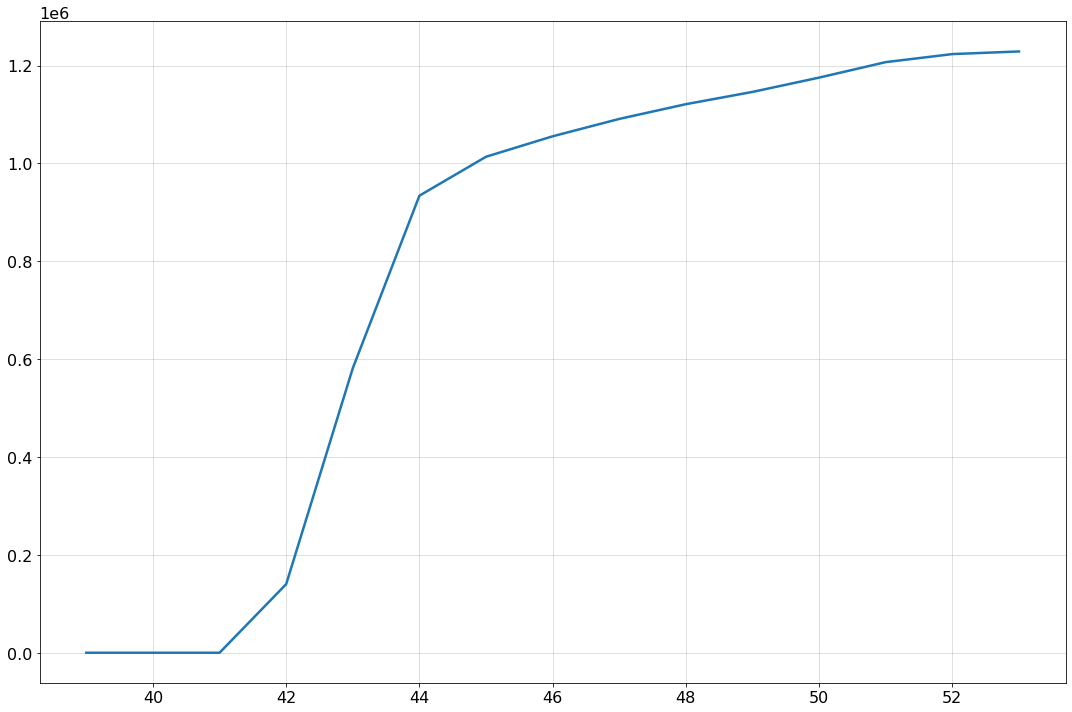

In [61]:
plt.plot(geo_vacc_per_age.weeks_from, geo_vacc_second_over_60)
plt.grid()

In [62]:
geo_vacc_per_age.weeks_from

0     39
1     40
2     41
3     42
4     43
5     44
6     45
7     46
8     47
9     48
10    49
11    50
12    51
13    52
14    53
Name: weeks_from, dtype: int64

In [63]:
age_gender_test_data

max_age  percentage_age  total_age_in_population  weeks_from  min_age  \
0         19            36.1                3321200.0           0      0.0   
1         24             7.2                 662400.0           0     20.0   
2         29             6.8                 625600.0           0     25.0   
3         34             6.6                 607200.0           0     30.0   
4         39             6.4                 588800.0           0     35.0   
..       ...             ...                      ...         ...      ...   
751       64             4.2                 386400.0          53     60.0   
752       69             3.9                 358800.0          53     65.0   
753       74             3.1                 285200.0          53     70.0   
754       79             1.8                 165600.0          53     75.0   
755      100             3.0                 276000.0          53     80.0   

     gender  weekly_tests_num  weekly_cases  weekly_deceased  
0         0            1910.0          68.0              0.0  
1         0            1296.0         135.0              0.0  
2         1            1308.0          98.0              0.0  
3         1            1304.0          88.0              0.0  
4         0            1053.0          73.0              0.0  
..      ...               ...           ...              ...  
751       0           10432.0          94.0              2.0  
752       0            8419.0          92.0              2.0  
753       0            6803.0          65.0              2.0  
754       0            3375.0          44.0              2.0  
755       0            7334.0          72.0             31.0  

[756 rows x 9 columns]

## draw cities per week

In [239]:
def draw_towns_per_population(data_per_town):
    colors = get_cmap(n=200)
    fig, ax = plt.subplots(2, 1)
    for i, (t, df_t) in enumerate(data_per_town.groupby('town')):
        n_vacc = np.array(df_t['weekly_tests_num'])
        n_new_pos = np.array(df_t['weekly_cases'])
        n_weeks = np.array(df_t['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax